In [3]:
# create graph
import Generator
import importlib
importlib.reload(Generator)
import load_graph
importlib.reload(load_graph)
import numpy as np 
import random as rd
import networkx as nx

l=10
k=10
p_=0.4
path='datasets//l10_k10_p0.4_multiplied//new_version//'
m=int(l*(l-1)/2*k)

P=[rd.uniform(0.00001,0.5) for _ in range(m)]
rd.shuffle(P)
g=Generator.evolving(k,l,p_,P)
print(type(g))
print(list(g.edges))
W=[]
edge=[]
for u,v,w in g.edges(data=True):
    W.append(w['weight'])
    edge.append((u,v))
print(W)

l=[0.0,0.1,0.2,0.3,0.4,0.5] #multiplied values

for _ in range(len(l)):
    multi=l[_]
    graph=nx.Graph()
    W_=[multi+i for i in W]
    weight=[]
    for i in range(len(edge)):
        temp=[]
        temp.append(edge[i][0])
        temp.append(edge[i][1])
        temp.append(W_[i])
        weight.append(temp)
    graph.add_weighted_edges_from(weight)

    filename='k10_l10_p0.4_multi'+str(multi)+'.txt'
    
    load_graph.loading_g(k,l,p_,graph,path+filename)

        



<class 'networkx.classes.graph.Graph'>
[(0, 1), (0, 2), (0, 5), (0, 6), (0, 7), (0, 9), (0, 25), (0, 11), (1, 2), (1, 4), (1, 6), (1, 9), (1, 92), (1, 51), (1, 71), (1, 82), (1, 48), (2, 3), (2, 4), (2, 6), (2, 8), (2, 9), (2, 47), (2, 62), (2, 65), (2, 83), (2, 18), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (5, 9), (5, 97), (5, 76), (6, 4), (6, 53), (6, 20), (6, 39), (6, 73), (6, 68), (7, 3), (7, 8), (7, 9), (7, 44), (7, 43), (7, 82), (7, 31), (7, 60), (9, 8), (9, 55), (9, 19), (9, 68), (9, 95), (25, 20), (25, 21), (25, 27), (25, 28), (25, 69), (25, 99), (25, 43), (11, 14), (11, 16), (11, 78), (11, 36), (11, 67), (11, 29), (11, 97), (4, 8), (4, 88), (4, 23), (4, 96), (4, 15), (4, 62), (92, 14), (92, 18), (92, 59), (92, 90), (92, 93), (92, 96), (51, 50), (51, 52), (51, 54), (51, 55), (51, 57), (51, 58), (51, 59), (51, 69), (71, 18), (71, 24), (71, 31), (71, 52), (71, 73), (71, 75), (71, 76), (71, 79), (82, 30), (82, 63), (82, 66), (82, 72), (82, 80), (82, 83), (82, 85), (82, 88), (82, 89

## AMI && expected value

In [ ]:
import json
from sklearn.metrics.cluster import adjusted_mutual_info_score as ami
from Expected_mod import Trans_C1, Trans_C2, APWP
path='//Users//xinsh758//documents//academic//evaluation//Evaluation//mcp_acp_data//l10_k10_p0.4_multiplied//new//'
k=10
l=10
cc=[i for i in range(k*l)]
    
stad_cluster=[cc[x:x+l] for x in range(0, len(cc), l)]
print(stad_cluster)



# bayes
multi_bayes=[0.0,0.1,0.2,0.3,0.4,0.5]
ami_bayes=[0.0,
0.052110446998558366,
0.14358515197742952,
0.10328452454688823,
0.11058687449591724,
0.09414022196351422]
# mcp
path2='mcp_results//'
with open(path+path2+'mcpc.json','r') as fp:
    data=json.load(fp)
multi_mcp=[]
ami_mcp=[]
mod_mcp=[]
for _ in data:
    
    multi_mcp.append(float(_))
    ami_mcp.append(ami(Trans_C2(stad_cluster,k*l),Trans_C2(data[str(_)],k*l)))
   




[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]


In [21]:
#acp

path2='acp_results//'
with open(path+path2+'acpc.json','r') as fp:
    data=json.load(fp)
multi_acp=[]
ami_acp=[]
for _ in data:
    multi_acp.append(float(_))
    ami_acp.append(ami(Trans_C2(stad_cluster,k*l),Trans_C2(data[str(_)],k*l)))
multi_acp

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [24]:
# gmm
#acp

path2='gmm_results//'
with open(path+path2+'gmm.json','r') as fp:
    data=json.load(fp)
multi_gmm=[]
ami_gmm=[]
for _ in data:
    multi_gmm.append(float(_))
    ami_gmm.append(ami(Trans_C2(stad_cluster,k*l),Trans_C2(data[str(_)],k*l)))
multi_gmm

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [11]:
#louvain

path2='louvain_results//'
with open(path+path2+'louvain.json','r') as fp:
    data=json.load(fp)
multi_louvain=[]
ami_louvain=[]
for _ in data:
    multi_louvain.append(float(_))
    ami_louvain.append(ami(Trans_C2(stad_cluster,k*l),Trans_C2(data[str(_)],k*l)))

In [12]:
#info

path2='Infomap_results//'
with open(path+path2+'infomap.json','r') as fp:
    data=json.load(fp)
multi_info=[]
ami_info=[]
for _ in data:
    multi_info.append(float(_))
    ami_info.append(ami(Trans_C2(stad_cluster,k*l),Trans_C2(data[str(_)],k*l)))

In [13]:
#pkwik

path2='pwik_results//'
with open(path+path2+'pwik.json','r') as fp:
    data=json.load(fp)
multi_pwik=[]
ami_pwik=[]
for _ in data:
    multi_pwik.append(float(_))
    ami_pwik.append(ami(Trans_C2(stad_cluster,k*l),Trans_C2(data[str(_)],k*l)))

In [16]:
#embed

path2='embedding//'
with open(path+path2+'embedding_l10_k10_p0.4_multiplied.json','r') as fp:
    data=json.load(fp)
multi_embed=[]
ami_embed=[]
for _ in data:
    multi_embed.append(float(_))
    ami_embed.append(ami(Trans_C2(stad_cluster,k*l),Trans_C2(data[str(_)],k*l)))

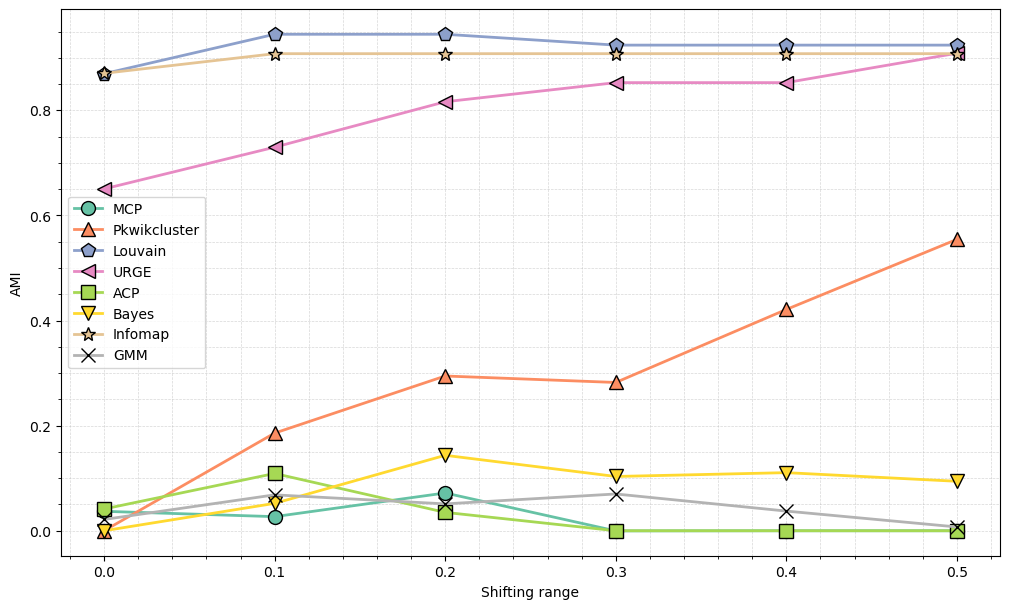

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

data = [ami_mcp, ami_pwik, ami_louvain, ami_embed, ami_acp, ami_bayes, ami_info, ami_gmm]
X=[multi_mcp,multi_pwik,multi_louvain,multi_embed,multi_acp,multi_bayes,multi_info,multi_gmm]

markers = ['o', '^', 'p', '<', 's', 'v',  '*','x']
colors = get_cmap('Set2').colors  
labels = ['MCP', 'Pkwikcluster', 'Louvain', 'URGE',
           'ACP', 'Bayes', 'Infomap','GMM']

plt.figure(figsize=(10, 6))
for i in range(len(data)):
     
    plt.plot(
        X[i], data[i],
        marker=markers[i],
        linestyle='-',
        linewidth=2,
        label=labels[i],
        markersize=10,
        color=colors[i % len(colors)],
        markerfacecolor=colors[i % len(colors)],
        markeredgecolor='black'  
    )



# plt.xlabel('Ratio')
# plt.ylabel('Expected Modularity')
# #plt.title('Expected Modularity vs Ratio')
# plt.legend()
plt.tight_layout()


plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.minorticks_on() 

plt.legend()
plt.xlabel('Shifting range')
plt.ylabel('AMI')
plt.savefig('fig//ami_multiplied.pdf',bbox_inches='tight', pad_inches=0.1)

